In [39]:
import yfinance as yf
import datetime as dt
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt

In [40]:
yf.pdr_override()
start = dt.datetime(2019, 6,1)
now = dt.datetime.now()

Enter the stock symbol: AAPL
[*********************100%%**********************]  1 of 1 completed


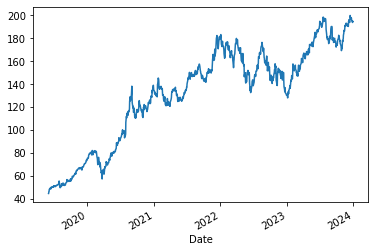


51.27: 2019-07-05 00:00:00
55.34: 2019-07-31 00:00:00
53.61: 2019-08-22 00:00:00
56.6: 2019-09-12 00:00:00
67.0: 2019-11-19 00:00:00
81.96: 2020-01-29 00:00:00
81.81: 2020-02-12 00:00:00
76.0: 2020-03-03 00:00:00
72.06: 2020-04-14 00:00:00
79.92: 2020-05-12 00:00:00
81.06: 2020-05-26 00:00:00
93.1: 2020-06-23 00:00:00
99.96: 2020-07-13 00:00:00
137.98: 2020-09-02 00:00:00
117.72: 2020-10-01 00:00:00
125.39: 2020-10-13 00:00:00
121.99: 2020-11-09 00:00:00
138.79: 2020-12-29 00:00:00
145.09: 2021-01-25 00:00:00
137.88: 2021-02-09 00:00:00
128.72: 2021-03-02 00:00:00
127.22: 2021-03-16 00:00:00
135.53: 2021-04-20 00:00:00
137.07: 2021-04-29 00:00:00
128.32: 2021-05-25 00:00:00
150.0: 2021-07-15 00:00:00
149.83: 2021-07-26 00:00:00
151.68: 2021-08-17 00:00:00
157.26: 2021-09-07 00:00:00
153.17: 2021-10-28 00:00:00
165.7: 2021-11-22 00:00:00
182.13: 2021-12-13 00:00:00
182.94: 2022-01-04 00:00:00
176.65: 2022-02-09 00:00:00
168.91: 2022-03-03 00:00:00
179.61: 2022-03-30 00:00:00
171.53: 20

In [45]:
stock = input("Enter the stock symbol: ")
while stock != "quit":
    df = pdr.get_data_yahoo(stock, start, now)
    df["High"].plot(label = "high")
    plt.show()
   
    pivots = []
    dates = []
    counter = 0
    lastPivot = 0
    Range = [0,0,0,0,0,0,0,0,0,0]
    dateRange = [0,0,0,0,0,0,0,0,0,0]
    
    for i in df.index:
        currentMax = max(Range, default = 0)
        value = round(df["High"][i],2)
        
        Range = Range[1:9]
        Range.append(value)
        
        dateRange = dateRange[1:9]
        dateRange.append(i)
        
        if currentMax == max(Range, default = 0):
            counter += 1
        else:
            counter = 0
            
        if counter == 5:
            lastPivot = currentMax
            dateLoc = Range.index(lastPivot)
            lastDate = dateRange[dateLoc]
            pivots.append(lastPivot)
            dates.append(lastDate)
            
    print()
    #print(str(pivots))
    #print(str(dates))
    
    for index in range(len(pivots)):
        print(str(pivots[index]) + ": " + str(dates[index]))
        
    stock = input("Enter the stock symbol: ")

In [ ]:
timeD = dt.timedelta(days = 30)
plt.plot_date([[dates[index], dates[index] + timeD], 
               [pivots[index], pivots[index]], 
               linestyle = "-", linewidth=2, marker=",")